# Lab 06 

# Relational & Tidy Data

In [1]:
library(tidyverse)
library(nycflights13)

Warning message:
"package 'tidyverse' was built under R version 4.1.1"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.1.0"
Warning message:
"package 'tibble' was built under R version 4.1.1"
Warning message:
"package 'tidyr' was built under R version 4.1.1"
Warning message:
"package 'readr' was built under R version 4.1.1"
Warning message:
"package 'purrr' was built under R version 4.1.1"
Warning message:
"package 'dplyr' was built under R version 4.1.0"
Warning message:
"package 'stringr' was built under R version 4.1.1"
Warning message:
"package 'forcats' was built under R version 4.1.1"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() -

## Review left_join() and relational data

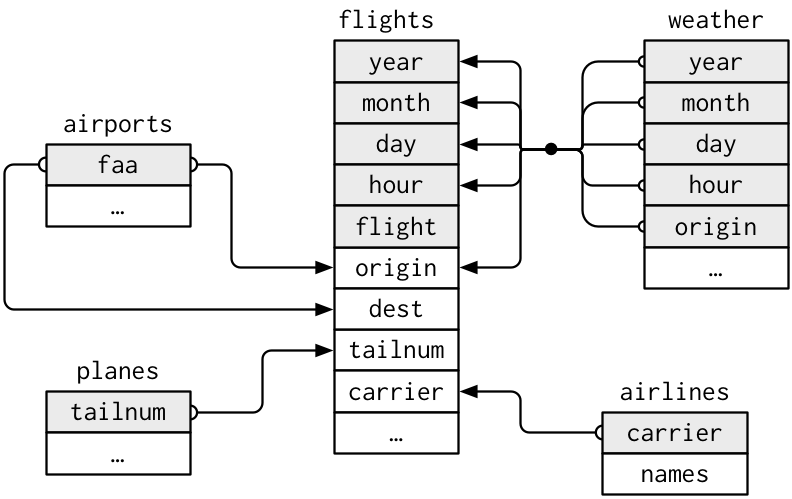

Most of the time "in the wild" our data won't be nice and neat, and will be organized in different ways & tables. Our job as statitians/ data scientists is to be able combine & use them.

What is the relationship between weather and airports and how should it appear in the diagram?

What is the difference between a primary key, a foreign key and a surrogate key?

What is a join? What is the difference between an inner join/outter join? A left, right and full join?

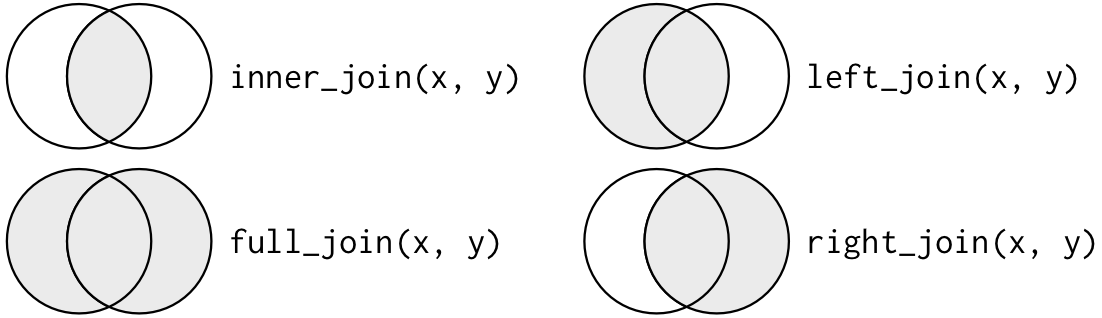

### Duplicate keys:
1. One table has duplicate keys. This is useful when you want to add in additional information as there is typically a one-to-many relationship. ![duplicate keys](http://r4ds.had.co.nz/diagrams/join-one-to-many.png)

In [2]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     2, "x3",
     1, "x4"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2"
)

In [3]:
left_join(x, y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
2,x3,y2
1,x4,y1


2. Both tables have duplicate keys
This represents a many-to-many join and is usually an error since they key does not uniquely identify observations in either table. Joining duplicated keys results in the Cartesian product of all the possible matches:
![cartesian](http://r4ds.had.co.nz/diagrams/join-many-to-many.png)

In [4]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     2, "x3",
     3, "x4"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2",
     2, "y3",
     3, "y4"
)


In [5]:
left_join(x, y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
2,x2,y3
2,x3,y2
2,x3,y3
3,x4,y4


### Defining the key columns
When we do a join using `left_join()`, R take as the key whatever column names the two tables have in common:

In [6]:
flights2 <- flights %>% 
  select(year:day, hour, origin, dest, tailnum, carrier)

1. The default, by = NULL, uses all variables that appear in both tables, the so called natural join. For example, the flights and weather tables match on their common variables: year, month, day, hour and origin.

In [7]:
flights2 %>% 
  left_join(weather)

Joining, by = c("year", "month", "day", "hour", "origin")



year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,5,EWR,IAH,N14228,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,5,LGA,IAH,N24211,UA,39.92,24.98,54.81,250,14.96014,21.86482,0,1011.4,10,2013-01-01 05:00:00
2013,1,1,5,JFK,MIA,N619AA,AA,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,5,JFK,BQN,N804JB,B6,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,6,LGA,ATL,N668DN,DL,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,5,EWR,ORD,N39463,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,6,EWR,FLL,N516JB,B6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00
2013,1,1,6,LGA,IAD,N829AS,EV,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,6,JFK,MCO,N593JB,B6,37.94,26.96,64.29,260,13.80936,NA,0,1012.6,10,2013-01-01 06:00:00


2. A character vector, by = "x". This is like a natural join, but uses only some of the common variables. For example, flights and planes have year variables, but they mean different things so we only want to join by tailnum.

In [8]:
flights2 %>% 
  left_join(planes, by = "tailnum")

year.x,month,day,hour,origin,dest,tailnum,carrier,year.y,type,manufacturer,model,engines,seats,speed,engine
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,1999,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,LGA,IAH,N24211,UA,1998,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,JFK,MIA,N619AA,AA,1990,Fixed wing multi engine,BOEING,757-223,2,178,NA,Turbo-fan
2013,1,1,5,JFK,BQN,N804JB,B6,2012,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,ATL,N668DN,DL,1991,Fixed wing multi engine,BOEING,757-232,2,178,NA,Turbo-fan
2013,1,1,5,EWR,ORD,N39463,UA,2012,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan
2013,1,1,6,EWR,FLL,N516JB,B6,2000,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,IAD,N829AS,EV,1998,Fixed wing multi engine,CANADAIR,CL-600-2B19,2,55,NA,Turbo-fan
2013,1,1,6,JFK,MCO,N593JB,B6,2004,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan


Note that the year variables (which appear in both input data frames, but are not constrained to be equal) are disambiguated in the output with a suffix.

3. A named character vector: by = c("a" = "b"). This will match variable a in table x to variable b in table y. The variables from x will be used in the output. For example, if we want to draw a map we need to combine the flights data with the airports data which contains the location (lat and lon) of each airport. Each flight has an origin and destination airport, so we need to specify which one we want to join to:

In [9]:
flights2 %>% 
  left_join(airports, c("dest" = "faa"))

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,LGA,IAH,N24211,UA,George Bush Intercontinental,29.98443,-95.34144,97,-6,A,America/Chicago
2013,1,1,5,JFK,MIA,N619AA,AA,Miami Intl,25.79325,-80.29056,8,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,NA,NA,NA,NA,NA,NA,NA
2013,1,1,6,LGA,ATL,N668DN,DL,Hartsfield Jackson Atlanta Intl,33.63672,-84.42807,1026,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Chicago Ohare Intl,41.97860,-87.90484,668,-6,A,America/Chicago
2013,1,1,6,EWR,FLL,N516JB,B6,Fort Lauderdale Hollywood Intl,26.07258,-80.15275,9,-5,A,America/New_York
2013,1,1,6,LGA,IAD,N829AS,EV,Washington Dulles Intl,38.94453,-77.45581,313,-5,A,America/New_York
2013,1,1,6,JFK,MCO,N593JB,B6,Orlando Intl,28.42939,-81.30899,96,-5,A,America/New_York


In [10]:
flights2 %>% 
  left_join(airports, c("origin" = "faa")) 

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,5,LGA,IAH,N24211,UA,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,JFK,MIA,N619AA,AA,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,6,LGA,ATL,N668DN,DL,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,6,EWR,FLL,N516JB,B6,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,6,LGA,IAD,N829AS,EV,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,6,JFK,MCO,N593JB,B6,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York


semi_join vs. anti_join?

Note: Info about joins is on the dyplr cheetsheet we have already talked about!

## Exercises:
(these are to get you thinking) How would you answer these questions, what data sets would you need?

Is there a relationship between the age of a plane and its delays?

What weather conditions make it more likely to see a delay?

Filter flights to only show flights with planes that have flown at least 100 flights.

Find the 48 hours (over the course of the whole year) that have the worst delays. Cross-reference it with the weather data. Can you see any patterns?

You might expect that there’s an implicit relationship between plane and airline, because each plane is flown by a single airline. Confirm or reject this hypothesis using the tools you’ve learned above.

## Final Projects

We will go into details more next week, but for now you can start putting together groups and picking data sets.


Sign up for groups: https://docs.google.com/spreadsheets/d/1ufLnrdTBd_y2x5mQdjjV3sgCAdKIvcNF9gTAWy7BnLI/edit?usp=sharing

**Notes:**
 - Each team should have 3-4 members. Please do not form teams with single members or pairs.
 - This sheet is just for forming teams, please do not start working on the project yet, as we may modify the dataset slightly.
 - Only students from the same lab could form one team.
 - Each team can choose any data set from 4 data sets below. 
    -  NFL Data: https://www.kaggle.com/maxhorowitz/nflplaybyplay2015/data
    -  New Coder survey: https://github.com/freeCodeCamp/2017-new-coder-survey
    -  Hotel booking data: https://www.kaggle.com/jessemostipak/hotel-booking-demand
    -  Chicago traffic cams: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
    
 